<a href="https://colab.research.google.com/github/keziammanuela/KomputasiIntelegensiaTasks/blob/main/EndTermTask/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain Tumor Detection with CNN**

Nama: Kezia Emmanuela Bangun

NPM: 2006572964

Reference code: https://www.kaggle.com/code/figolm10/brain-tumor-detection-using-cnn#Image-Preprocessing-Steps

Data from: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

# Import Library

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image
from sklearn.model_selection import train_test_split

# Load Data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")

print("Path to dataset files:", path)

100%|██████████| 15.1M/15.1M [00:00<00:00, 108MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1


In [3]:
import os

# Menampilkan struktur direktori dataset
for root, dirs, files in os.walk(path):
    print(root)
    for name in dirs:
        print(f"Dir: {name}")
    for name in files:
        print(f"File: {name}")

/root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1
Dir: brain_tumor_dataset
Dir: yes
Dir: no
/root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/brain_tumor_dataset
Dir: yes
Dir: no
/root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/brain_tumor_dataset/yes
File: Y79.jpg
File: Y30.jpg
File: Y245.jpg
File: Y35.jpg
File: Y36.JPG
File: Y22.jpg
File: Y11.jpg
File: Y90.jpg
File: Y51.jpg
File: Y21.jpg
File: Y183.jpg
File: Y244.JPG
File: Y193.JPG
File: Y106.jpg
File: Y188.jpg
File: Y53.jpg
File: Y256.JPG
File: Y74.jpg
File: Y41.jpg
File: Y158.JPG
File: Y54.jpg
File: Y60.jpg
File: Y69.jpg
File: Y52.jpg
File: Y14.jpg
File: Y194.jpg
File: Y168.jpg
File: Y58.JPG
File: Y82.jpg
File: Y99.JPG
File: Y180.jpg
File: Y147.JPG
File: Y112.JPG
File: Y101.jpg
File: Y162.jpg
File: Y254.jpg
File: Y105.jpg
File: Y159.JPG
File: Y19.JPG
File: Y66.JPG
File: Y44.JPG
File: Y166.JPG
File:

For Normal Cells

In [4]:
# Path folder no
normal_cells_path = os.path.join(path, 'no')

# List file dalam folder no
normal_cells = os.listdir(normal_cells_path)

# Menampilkan 5 file pertama dan terakhir
print("Normal cells (no tumor):", normal_cells[0:5])
print("Normal cells (no tumor):", normal_cells[-5:])

Normal cells (no tumor): ['39 no.jpg', '34 no.jpg', 'no 94.jpg', 'no 6.jpg', '40 no.jpg']
Normal cells (no tumor): ['no 8.jpg', 'No16.jpg', '28 no.jpg', '8 no.jpg', '43 no.jpg']


For Tumor Cells

In [5]:
# Path folder yes
tumor_cells_path = os.path.join(path, 'yes')

# List file dalam folder yes
tumor_cells = os.listdir(tumor_cells_path)

# Menampilkan 5 file pertama dan terakhir
print("Tumor cells (with tumor):", tumor_cells[0:5])
print("Tumor cells (with tumor):", tumor_cells[-5:])

Tumor cells (with tumor): ['Y79.jpg', 'Y30.jpg', 'Y245.jpg', 'Y35.jpg', 'Y36.JPG']
Tumor cells (with tumor): ['Y161.JPG', 'Y102.jpg', 'Y113.JPG', 'Y62.jpg', 'Y2.jpg']


In [6]:
# Length of the images from both of the files
print('Length of the Normal Brain Cells: ',len(normal_cells))
print('Length of the Cancurus Brain Cells: ',len(tumor_cells))

Length of the Normal Brain Cells:  98
Length of the Cancurus Brain Cells:  155


# Creating the Labels
- 0 --> Normal Cell
- 1 --> Tumor Cell

In [7]:
normal_label=[0]*98
tumor_label=[1]*155

In [8]:
print('Normal Cell labels: ',len(normal_label))
print('Tumor Cell labels: ',len(tumor_label))

Normal Cell labels:  98
Tumor Cell labels:  155


In [9]:
print('With Normal labels: ',normal_label[0:5])
print('With Tumor labels: ',tumor_label[0:5])

With Normal labels:  [0, 0, 0, 0, 0]
With Tumor labels:  [1, 1, 1, 1, 1]


# Combining both labels into a single column

In [10]:
labels=normal_label+tumor_label

print('Total labels are: ',len(labels))

print(labels[0:5])
print(labels[-5:])

Total labels are:  253
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [11]:
type(labels)

list

# Data Visualization

Normal Cell image

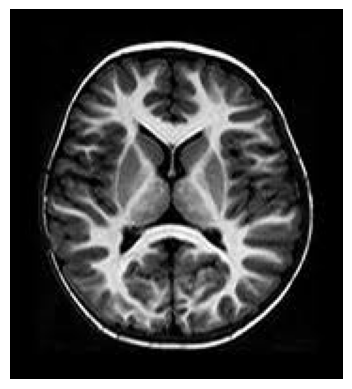

In [29]:
# Path ke gambar 14 no.jpg
img_path1 = os.path.join(normal_cells_path, '14 no.jpg')

# Membaca dan menampilkan gambar
nor_img = mpimg.imread(img_path1)
plt.imshow(nor_img)
plt.axis('off')  # Menghilangkan axis agar lebih rapi
plt.show()

Tumour Cell image

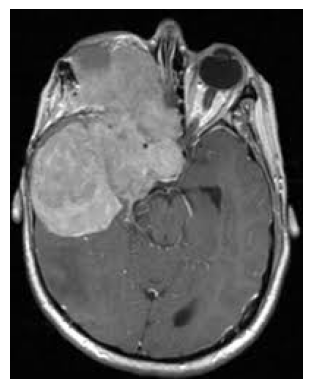

In [30]:
# Path ke gambar Y106.jpg
img_path2 = os.path.join(tumor_cells_path, 'Y106.jpg')

# Membaca dan menampilkan gambar
tumor_img = mpimg.imread(img_path2)
plt.imshow(tumor_img)
plt.axis('off')  # Menghilangkan axis agar lebih rapi
plt.show()

See the Distribution of the Labeled column

<Axes: ylabel='count'>

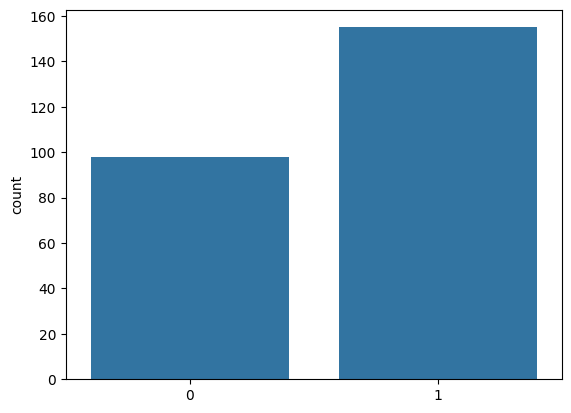

In [14]:
import seaborn as sn

sn.countplot(x=labels)

# Image Preprocessing Steps

In [31]:
# List untuk menyimpan data gambar
data = []

# Loop untuk membaca gambar dari folder no (tanpa tumor)
for img_file in normal_cells:
    image = Image.open(os.path.join(normal_cells_path, img_file))
    image = image.resize((128, 128))  # Resize ke 128x128
    image = image.convert('RGB')  # Konversi ke RGB
    image = np.array(image)  # Konversi ke array numpy
    data.append(image)  # Tambahkan ke list data

# Loop untuk membaca gambar dari folder yes (dengan tumor)
for img_file in tumor_cells:
    image = Image.open(os.path.join(tumor_cells_path, img_file))
    image = image.resize((128, 128))  # Resize ke 128x128
    image = image.convert('RGB')  # Konversi ke RGB
    image = np.array(image)  # Konversi ke array numpy
    data.append(image)  # Tambahkan ke list data

In [16]:
type(data)

list

total length of the data

In [17]:
len(data)

253

Checking the first image

array([[[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)
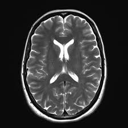

In [32]:
data[0]

In [33]:
type(data[0])

numpy.ndarray

Checking the shape of the single image

In [20]:
data[0].shape

(128, 128, 3)

# Converting data and labels into numpy array

In [34]:
X=np.array(data)
Y=np.array(labels)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(Y)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(253, 128, 128, 3)
(253,)


# Train Test Split

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=101)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(253, 128, 128, 3) (202, 128, 128, 3) (51, 128, 128, 3)


# Scaling the data

In [37]:
X_train=X_train/255
X_test=X_test/255

In [38]:
X_train[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

# Model Building

In [39]:
!pip install keras

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

a. Model Building

In [41]:
num_of_classes=2

model=Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_of_classes, activation='sigmoid'))

b. Compiling the model

In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c. Training the model

In [43]:
#from keras.callbacks import EarlyStopping

#early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history=model.fit(X_train,Y_train, epochs=50, validation_split=0.1, verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4793 - loss: 7.4609 - val_accuracy: 0.6667 - val_loss: 4.1477
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7593 - loss: 2.2971 - val_accuracy: 0.6190 - val_loss: 2.3818
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6770 - loss: 1.3640 - val_accuracy: 0.8095 - val_loss: 1.0337
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8006 - loss: 0.6601 - val_accuracy: 0.8095 - val_loss: 0.4360
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9500 - loss: 0.1909 - val_accuracy: 0.8095 - val_loss: 0.3836
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9120 - loss: 0.1865 - val_accuracy: 0.8571 - val_loss: 0.3179
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9875 - loss: 0.0847 - val_accuracy: 0.8095 - val_loss: 0.2865
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9765 - loss: 0.0713 - val_accuracy: 0.8095 - val_loss: 0.2635
Epoch 9/50
6

d. Model Evaluation

In [44]:
model.evaluate(X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step - accuracy: 0.9034 - loss: 0.6841


[0.6276324391365051, 0.9019607901573181]

e. Learning Curve

i) Accuracy Curve

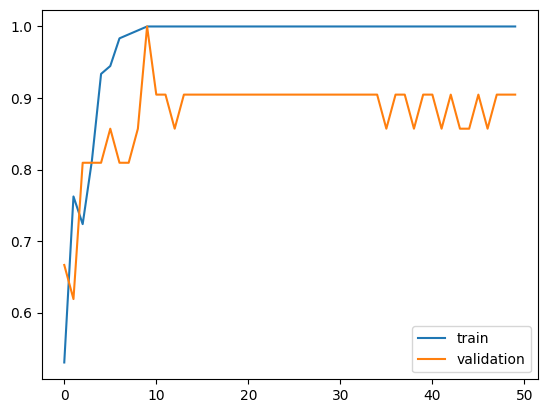

In [45]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')

plt.legend()
plt.show()

ii) Loss Curve

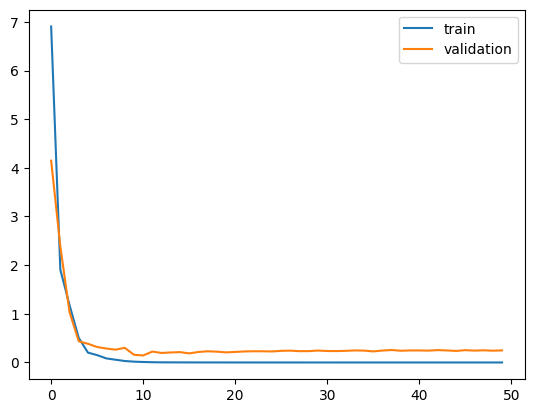

In [46]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.legend()
plt.show()

Terlihat dari Accuracy Curve dan Loss Curve bahwa model overfitting. Sehingga akan dilakukan langkah berikut untuk menangani agar model tidak overfitting.

f. Data Augmentation

In [80]:
num_of_classes = 2

In [98]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

g. Model architecture with regularization and dropout

In [99]:
model = Sequential()

h. Model Building

In [52]:
# Convolutional layer
image_height, image_width = 128, 128  # Define image dimensions
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(image_height, image_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))  # Output is a single probability for the "tumor" class

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
# Convolutional layer with regularization and batch normalization
image_height, image_width = 128, 128  # Define image dimensions
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(image_height, image_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_of_classes, activation='sigmoid'))  # Use softmax for multi-class classification

In [100]:
# Convolutional layer
image_height, image_width = 128, 128  # Define image dimensions
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(image_height, image_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_of_classes, activation='sigmoid'))  # For binary classification, use sigmoid with a single output neuron and binary_crossentropy loss

i. Compile the model

In [101]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

j. Early stopping

In [102]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

k. Train the model

In [103]:
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32, subset='training'),
    validation_data=datagen.flow(X_train, Y_train, batch_size=32, subset='validation'),
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6097 - loss: 0.9371 - val_accuracy: 0.7000 - val_loss: 0.8833
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6588 - loss: 0.9346 - val_accuracy: 0.7000 - val_loss: 1.0320
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6666 - loss: 0.8929 - val_accuracy: 0.7000 - val_loss: 0.8977
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6502 - loss: 0.9327 - val_accuracy: 0.7000 - val_loss: 0.8882
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6458 - loss: 0.8792 - val_accuracy: 0.7000 - val_loss: 0.8432
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7624 - loss: 0.8046 - val_accuracy: 0.7000 - val_loss: 0.8469
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6785 - loss: 0.7879 - val_accuracy: 0.7000 - val_loss: 0.8277
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.6755 - loss: 0.8015 - val_accuracy: 0.7000 - val_loss: 0.7902
Epoch 9/

l. Model evaluation

In [104]:
model.evaluate(X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step - accuracy: 0.6344 - loss: 4.9594


[5.206418991088867, 0.6078431606292725]

Accuracy curve

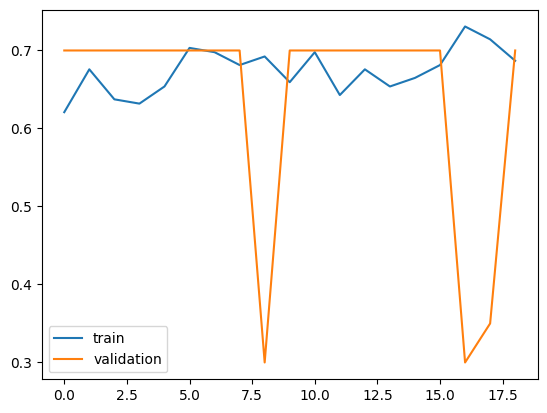

In [105]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')

plt.legend()
plt.show()

Loss curve

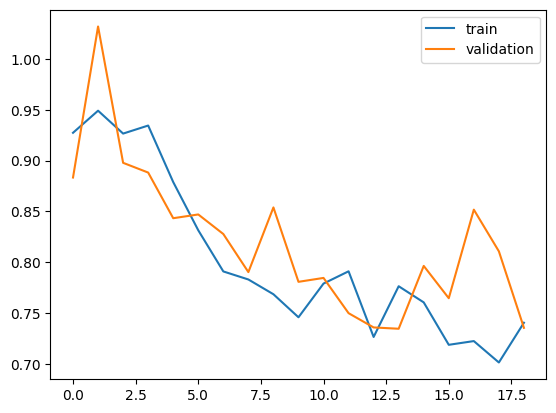

In [106]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.legend()
plt.show()

# Saving the model

In [ ]:
# Simpan model ke direktori kerja Google Colab
model.save('/content/tumor_detection.keras')

print("Model saved at: /content/tumor_detection.keras")

# Prediction Function

In [107]:
from google.colab import files
from keras.models import load_model

# Upload gambar dari komputer lokal
uploaded = files.upload()

# Ambil path gambar yang diunggah
input_image_path = list(uploaded.keys())[0]

Saving mri brain 1.png to mri brain 1.png


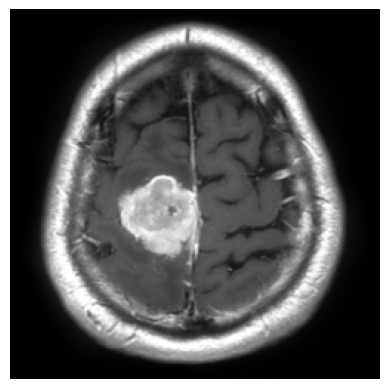

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Prediction Probabilities are: [[0.00469015 0.99998134]]
Tumor Cell


In [108]:
# Membaca gambar input
input_image = cv2.imread(input_image_path)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Konversi ke RGB untuk plt

# Tampilkan gambar input
plt.imshow(input_image_rgb)
plt.axis('off')  # Sembunyikan axis
plt.show()

# Resize gambar agar sesuai dengan input model (128x128 dalam hal ini)
input_image_reshape = cv2.resize(input_image, (128, 128))

# Normalize nilai piksel antara 0 dan 1
image_normalized = input_image_reshape / 255.0

# Ubah bentuk gambar menjadi (1, 128, 128, 3) agar sesuai dengan input model
img_reshape = np.reshape(image_normalized, (1, 128, 128, 3))

# Prediksi menggunakan model
input_prediction = model.predict(img_reshape)

# Tampilkan probabilitas prediksi
print('Prediction Probabilities are:', input_prediction)

# Ambil label prediksi (0 untuk Normal, 1 untuk Tumor)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
    print('Tumor Cell')
else:
    print('Normal Cell')